In [5]:
import tensorflow as tf
import keras
from keras.datasets import mnist
import cv2
import numpy as np
print(tf.__version__)
print(keras.__version__)

2.0.0-alpha0
2.3.1


In [6]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()
##gray scale images doesnot have colour depth
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [7]:
'''displaying the dataset'''
for i in range(0,6):
    random=np.random.randint(0, len(x_train))
    img= x_train[random]
    window='Random Sample '+str(i)
    cv2.imshow(window,img)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
'''Preparing dataset'''
rows=x_train[0].shape[0]
columns=x_train[0].shape[1]
input_shape=[rows, columns, 1] ##input shape with colour depth for gray scale image

##changing shape of data to required shape for Keras by changing shape from (60000,28,28) to (60000,28,28,1)
x_train=x_train.reshape(x_train.shape[0], rows, columns, 1)
x_test=x_test.reshape(x_test.shape[0], rows, columns, 1)

##changing input data type to float32 data type
x_train= x_train.astype('float32')
x_test=x_test.astype('float32')

##normalizing data to change range from (0 to 255) to (0 to 1)
x_train/=255
x_test/=255

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
'''One hot Encoding for the labels'''
from keras.utils import np_utils
y_train= np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)
print("No. of classes  are: "+ str(y_test.shape[1]))
num_classes= y_test.shape[1]
num_pixels= x_train.shape[1]*x_train.shape[2]

No. of classes  are: 10


In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
'''creating the model'''
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import SGD
model= Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss="categorical_crossentropy", optimizer= SGD(0.01), metrics= ['accuracy']) ##sgd- stochastic gradient descent
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [12]:
'''Training the model'''
epochs=10

history= model.fit(x_train, y_train, epochs=epochs, batch_size=32, validation_data=(x_test, y_test))
loss= model.evaluate(x_test, y_test, batch_size=128)
print("Test loss: ", loss[0])
print("Test accuracy: ", loss[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 91s 2ms/step - loss: 0.5914 - accuracy: 0.8153 - val_loss: 0.2032 - val_accuracy: 0.9426
Epoch 2/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.2948 - accuracy: 0.9104 - val_loss: 0.1442 - val_accuracy: 0.9569
Epoch 3/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.2249 - accuracy: 0.9324 - val_loss: 0.1057 - val_accuracy: 0.9696
Epoch 4/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.1748 - accuracy: 0.9472 - val_loss: 0.0851 - val_accuracy: 0.9735
Epoch 5/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.1423 - accuracy: 0.9575 - val_loss: 0.0694 - val_accuracy: 0.9785
Epoch 6/10
60000/60000 [==============================] - 108s 2ms/step - loss: 0.1238 - accuracy: 0.9635 - val_loss: 0.0608 - val_accuracy: 0.9799
Epoch 7/10
60000/60000 [==============================] - 111s 

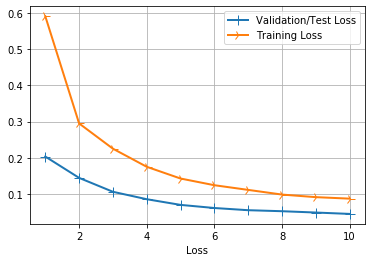

In [13]:
'''Plotting accuracy'''
import matplotlib.pyplot as plt

history_dic=history.history
loss_values=history_dic['loss']
val_loss=history_dic['val_loss']
epochs=range(1,(len(loss_values)+1))

line1=plt.plot(epochs, val_loss, label= 'Validation/Test Loss')
line2=plt.plot(epochs, loss_values, label= 'Training Loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10)
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [14]:
'''Saving Model'''
model.save('C:/Users/alber/mnist_simple_cnn_10epoch.h5')
print('Model Saved')

Model Saved


In [15]:
'''Loading Model'''
from keras.models import load_model
classifier=load_model('C:/Users/alber/mnist_simple_cnn_10epoch.h5')
print('Model Loaded')

Model Loaded


In [16]:
'''Testing Model'''
def draw_test(name, pred, input_im):
    BLACK= [0,0,0]
    expanded_image=cv2.copyMakeBorder(input_im, 0,0,0, imageL.shape[0], cv2.BORDER_CONSTANT, value=BLACK)
    expanded_image=cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152,70), cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0,255,0), 2)
    cv2.imshow(name, expanded_image)
    
for i in range (0, 10):
    rand=np.random.randint(0, len(x_test))
    input_im=x_test[rand]
    

    imageL=cv2.resize(input_im, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
    input_im=input_im.reshape(1,28,28,1)
    
    res= str(classifier.predict_classes(input_im,1, verbose=0)[0])
    
    draw_test("Prediction", res, imageL)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()